In [238]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.models import Sequential
from keras.layers import LSTM,Dense
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

In [239]:
data = pd.read_csv('MSFT.csv',index_col=0)
data.head()

,ds,open,high,low,close,volume
0,2019-09-13,137.78,138.06,136.57,137.32,16554185.0
1,2019-09-12,137.85,138.42,136.87,137.52,25750600.0
2,2019-09-11,135.91,136.27,135.09,136.12,24726100.0
3,2019-09-10,136.80,136.89,134.51,136.08,28903400.0
4,2019-09-09,139.59,139.75,136.46,137.52,25773900.0


In [240]:
data = data.reset_index().rename(axis=1,mapper={'index':'item_id','ds':'timestamp',
                                        'close':'target_value','open':'open_'})
data.loc[:1000].to_csv('MSFT_amazon.csv',index=False)

In [241]:
data.columns

Index(['item_id', 'timestamp', 'open_', 'high', 'low', 'target_value',
       'volume'],
      dtype='object')

In [242]:
pd.read_csv('MSFT_amazon.csv').head()

,item_id,timestamp,open_,high,low,target_value,volume
0,0,2019-09-13,137.78,138.06,136.57,137.32,16554185.0
1,1,2019-09-12,137.85,138.42,136.87,137.52,25750600.0
2,2,2019-09-11,135.91,136.27,135.09,136.12,24726100.0
3,3,2019-09-10,136.80,136.89,134.51,136.08,28903400.0
4,4,2019-09-09,139.59,139.75,136.46,137.52,25773900.0


In [7]:
cl = data.Close.values

In [9]:
scl = MinMaxScaler()
#Scale the data
cl = cl.reshape(cl.shape[0],1)
cl = scl.fit_transform(cl)

In [10]:
def processData(data,lb):
    X,Y = [],[]
    for i in range(len(data)-lb-1):
        X.append(data[i:(i+lb),0])
        Y.append(data[(i+lb),0])
    return np.array(X),np.array(Y)
X,y = processData(cl,7)
X_train,X_test = X[:int(X.shape[0]*0.80)],X[int(X.shape[0]*0.80):]
y_train,y_test = y[:int(y.shape[0]*0.80)],y[int(y.shape[0]*0.80):]
print(X_train.shape[0])
print(X_test.shape[0])
print(y_train.shape[0])
print(y_test.shape[0])

188
47
188
47


In [14]:
model = Sequential()
model.add(LSTM(256,input_shape=(7,1)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')
#Reshape data for (Sample,Timestep,Features) 
X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],1))
#Fit model with history to check for overfitting
history = model.fit(X_train,y_train,epochs=300,validation_data=(X_test,y_test),shuffle=False)

W0914 20:50:36.582170 4441306560 deprecation_wrapper.py:119] From /Users/nithin/miniconda3/envs/test-env/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0914 20:50:36.646782 4441306560 deprecation_wrapper.py:119] From /Users/nithin/miniconda3/envs/test-env/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0914 20:50:36.666641 4441306560 deprecation_wrapper.py:119] From /Users/nithin/miniconda3/envs/test-env/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0914 20:50:37.069126 4441306560 deprecation_wrapper.py:119] From /Users/nithin/miniconda3/envs/test-env/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.

Train on 188 samples, validate on 47 samples
Epoch 1/300
188/188 [==============================] - 1s 8ms/step - loss: 0.1941 - val_loss: nan
Epoch 2/300
188/188 [==============================] - 0s 779us/step - loss: 0.0464 - val_loss: nan
Epoch 3/300
188/188 [==============================] - 0s 1ms/step - loss: 0.0262 - val_loss: nan
Epoch 4/300
188/188 [==============================] - 0s 979us/step - loss: 0.0284 - val_loss: nan
Epoch 5/300
188/188 [==============================] - 0s 1ms/step - loss: 0.0131 - val_loss: nan
Epoch 6/300
188/188 [==============================] - 0s 1ms/step - loss: 0.0176 - val_loss: nan
Epoch 7/300
188/188 [==============================] - 0s 1ms/step - loss: 0.0151 - val_loss: nan
Epoch 8/300
188/188 [==============================] - 0s 1ms/step - loss: 0.0139 - val_loss: nan
Epoch 9/300
188/188 [==============================] - 0s 1ms/step - loss: 0.0128 - val_loss: nan
Epoch 10/300
188/188 [==============================] - 0s 1ms/step -

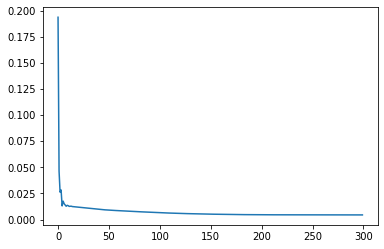

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [21]:
X_test[0]

array([[0.82089552],
       [0.90049751],
       [0.95024876],
       [0.91044776],
       [0.87562189],
       [0.79104478],
       [0.85074627]])

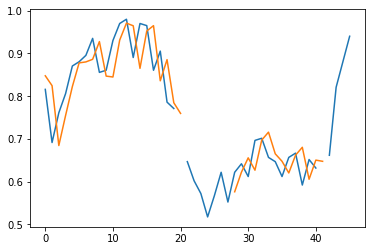

In [22]:
Xt = model.predict(X_test)
plt.plot(scl.inverse_transform(y_test.reshape(-1,1)))
plt.plot(scl.inverse_transform(Xt))


In [25]:
act = []
pred = []
#for i in range(250):
i=46
Xt = model.predict(X_test[i].reshape(1,7,1))
print('predicted:{0}, actual:{1}'.format(scl.inverse_transform(Xt),scl.inverse_transform(y_test[i].reshape(-1,1))))
pred.append(scl.inverse_transform(Xt))
act.append(scl.inverse_transform(y_test[i].reshape(-1,1)))

predicted:[[nan]], actual:[[nan]]


In [26]:
result_df = pd.DataFrame({'pred':list(np.reshape(pred, (-1))),'act':list(np.reshape(act, (-1)))})

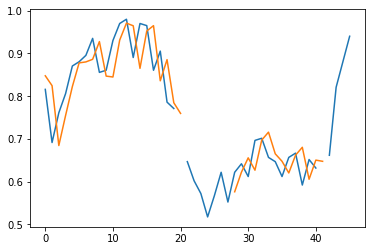

In [27]:
Xt = model.predict(X_test)
plt.plot(scl.inverse_transform(y_test.reshape(-1,1)))
plt.plot(scl.inverse_transform(Xt))

In [81]:
len(scl.inverse_transform(Xt))

47

In [83]:
len(y_test)

47

In [87]:
scl

MinMaxScaler(copy=True, feature_range=(0, 1))

In [35]:
import requests
import json 
from pandas.io.json import json_normalize


response = requests.get()
# print(response.status_code)
# #print(response.json())

# def jprint(obj):
#  data = json_normalize(obj)
#  return data

# data = jprint(response.json())

# #data1 = json_normalize(data['results'])
# print(data)

# #pass_times = response.json()['response']
# #jprint(pass_times)

In [55]:
data = response.json()
pd.read_json(json.dumps(data['Time Series (Daily)'])).transpose().reset_index().rename(axis=1,mapper={'index':'ds'}).head()

,ds,1. open,2. high,3. low,4. close,5. volume
0,2019-09-13,137.78,138.06,136.57,137.32,16554185.0
1,2019-09-12,137.85,138.42,136.87,137.52,25750600.0
2,2019-09-11,135.91,136.27,135.09,136.12,24726100.0
3,2019-09-10,136.80,136.89,134.51,136.08,28903400.0
4,2019-09-09,139.59,139.75,136.46,137.52,25773900.0


In [299]:
def get_data(company_name='MSFT',interval='none'):
    apikey = 'B4R0YOLPQIDQ1OIL'
    print(interval)
    if interval == 'none':
        frequency = 'TIME_SERIES_DAILY'
        url = f"https://www.alphavantage.co/query?function={frequency}&symbol={company_name}&apikey={apikey}&outputsize=full"
        r = requests.get(url)
        data = r.json()
        df = pd.read_json(json.dumps(data['Time Series (Daily)'])).transpose().reset_index().rename(axis=1,mapper={'index':'ds'})
    else:
        frequency = 'TIME_SERIES_INTRADAY'
        url = f"https://www.alphavantage.co/query?function={frequency}&symbol={company_name}&apikey={apikey}&outputsize=full&interval={interval}"
        r = requests.get(url)
        data = r.json()
        df = pd.read_json(json.dumps(data[f"Time Series ({interval})"])).transpose().reset_index().rename(axis=1,mapper={'index':'ds'})
    df['ds'] = pd.to_datetime(df['ds'])
    df = df.rename(axis=1,mapper={'1. open':'open',
                                  '5. volume':'volume',
                                 '2. high': 'high',
                                 '3. low': 'low',
                                 '4. close':'close'})
    return df

In [300]:
df = get_data("MSFT",'15min')

15min


In [301]:
df.head()

,ds,open,high,low,close,volume
0,2019-09-13 16:00:00,137.23,137.490,137.12,137.220,2086013.0
1,2019-09-13 15:45:00,137.00,137.239,136.95,137.239,763025.0
2,2019-09-13 15:30:00,136.99,137.020,136.89,137.005,471595.0
3,2019-09-13 15:15:00,137.36,137.367,136.91,137.000,563164.0
4,2019-09-13 15:00:00,137.38,137.420,137.19,137.360,340189.0


In [258]:
r = requests.get("https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=MSFT&interval=5min&apikey=B4R0YOLPQIDQ1OIL&outputsize=full"
                )

In [259]:
r.json()['Meta Data']

{'1. Information': 'Intraday (5min) open, high, low, close prices and volume',
 '2. Symbol': 'MSFT',
 '3. Last Refreshed': '2019-09-13 16:00:00',
 '4. Interval': '5min',
 '5. Output Size': 'Full size',
 '6. Time Zone': 'US/Eastern'}

In [265]:
df = pd.read_json(json.dumps(r.json()['Time Series (5min)'])).transpose().reset_index()
df = df.rename(axis=1,mapper={'1. open':'Open',
                                  'index':'ds',
                                  '5. volume':'Volume',
                                 '2. high': 'High',
                                 '3. low': 'Low',
                                 '4. close':'Close'})
df['ds'] = pd.to_datetime(df['ds'])

In [267]:
pd.options.display.max_rows =None

In [270]:
df.sort_values('ds',ascending=True).to_csv('msft_hourly.csv',index=False)

In [271]:
df

,ds,Open,High,Low,Close,Volume
0,2019-09-13 16:00:00,137.2200,137.4900,137.1500,137.2200,1265854.0
1,2019-09-13 15:55:00,137.1800,137.3600,137.1250,137.2200,563768.0
2,2019-09-13 15:50:00,137.2300,137.2800,137.1100,137.1899,254607.0
3,2019-09-13 15:45:00,137.0900,137.2390,137.0700,137.2390,288104.0
4,2019-09-13 15:40:00,137.0450,137.1500,137.0350,137.0850,284683.0
5,2019-09-13 15:35:00,137.0000,137.0410,136.9500,137.0406,190238.0
6,2019-09-13 15:30:00,136.9800,137.0200,136.9400,137.0050,158070.0
7,2019-09-13 15:25:00,136.9700,136.9900,136.8900,136.9850,176457.0
8,2019-09-13 15:20:00,136.9900,137.0100,136.9050,136.9850,137068.0
9,2019-09-13 15:15:00,136.9700,137.0700,136.9100,137.0000,209151.0
